# Scikit Learn

# Régression sur le prix des maisons à boston

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [22]:
boston = datasets.load_boston()
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1.1) récupération des X et Y

In [ ]:
X = boston["data"]
y = boston["target"]

## 2) separer le jeu d'apprentissage du jeu de test

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) choisir un algo et le tester


[Documentation du Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
algo        = RandomForestRegressor()
modele      = algo.fit(X_train, y_train)
performance = modele.score(X_test, y_test)

In [14]:
performance

0.8597588038373313

# 4) grille de recherche

[Documentation grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
hyperparameters = {"max_depth" : [1,2,3]}

In [27]:
grille = GridSearchCV(algo, hyperparameters)

In [30]:
grille = grille.fit(X_train, y_train)

## 4.2) résultats

In [35]:
meilleur_model = grille.best_estimator_

In [34]:
grille.score(X_test, y_test)

0.8105203810236372

## 4.3) récupérer le modèle pour faire des prédictions

In [44]:
une_ligne  = X_test[1]
prediction = meilleur_model.predict([une_ligne])

In [45]:
prediction

array([22.13838832])

# 5) Features importances

In [59]:
import pandas as pd
from matplotlib import pyplot as plt

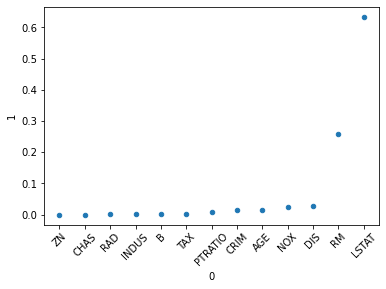

In [71]:
feature_importances = list(zip(boston["feature_names"], meilleur_model.feature_importances_))
feature_importances = pd.DataFrame(feature_importances)

feature_importances.sort_values(1).plot.scatter(x=0, y=1)
plt.xticks(rotation=45) ;

## 5.1) on récupère de l'info de la documentation

In [69]:
signification_des_colonnes = {
    "CRIM"     : "per capita crime rate by town",
    "ZN"       : "proportion of residential land zoned for lots over 25,000 sq.ft.",
    "INDUS"    : "proportion of non-retail business acres per town",
    "CHAS"     : "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "NOX"      : "nitric oxides concentration (parts per 10 million)",
    "RM"       : "average number of rooms per dwelling",
    "AGE"      : "proportion of owner-occupied units built prior to 1940",
    "DIS"      : "weighted distances to five Boston employment centres",
    "RAD"      : "index of accessibility to radial highways",
    "TAX"      : "full-value property-tax rate per $10,000",
    "PTRATIO"  : "pupil-teacher ratio by town",
    "B"        : "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "LSTAT"    : "% lower status of the population",
    "MEDV"     : "Median value of owner-occupied homes in $1000's"}


#### On map le dictionnaire sur les features, pour créer une colonne de signification : 

In [73]:
feature_importances["signification"] = feature_importances[0].map(signification_des_colonnes)

#### on retrace le graph, avec en x la signification, et une rotation de 90

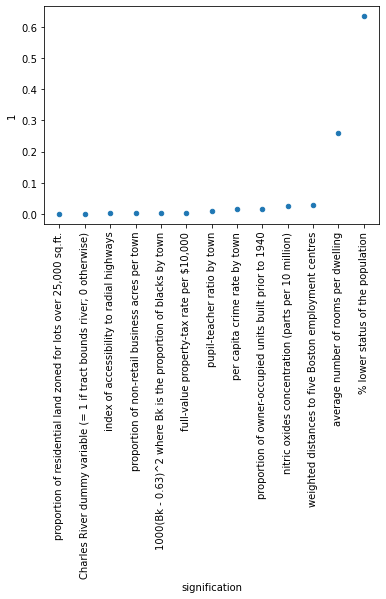

In [75]:
feature_importances.sort_values(1).plot.scatter(x="signification", y=1)
plt.xticks(rotation=90) ;